In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#Libraries
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [5]:
#Data Loading, Displaying a random sample of the dataset, and Splitting
def separate_futr_label(data, label_column):
    futr = data.drop(columns=[label_column])
    label = data[label_column]
    return futr, label

def calculate_rmse(model, futr, label):
    predict = model.predict(futr)
    rmse = mean_squared_error(label, predict, squared=False)
    return rmse

def split(data):
    train, test = train_test_split(data, test_size=0.2, random_state=70)
    return train, test

def load_and_display_data(file_path, sample_size=20):

    df = pd.read_csv(file_path, sep=";")

    random_sample = df.sample(n=sample_size, random_state=70)
    print(random_sample)

    return df

if __name__ == "__main__":
    df = load_and_display_data("/content/drive/MyDrive/Colab Notebooks/winequality-red.csv")
    train, test = split(df)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
728             6.4             0.570         0.02             1.8      0.067   
779             7.1             0.520         0.03             2.6      0.076   
1206            7.2             0.360         0.46             2.1      0.074   
298             7.2             0.650         0.02             2.3      0.094   
370             6.9             0.765         0.02             2.3      0.063   
1413            9.9             0.570         0.25             2.0      0.104   
951             8.3             0.280         0.48             2.1      0.093   
450            11.9             0.390         0.69             2.8      0.095   
1032            8.1             0.820         0.00             4.1      0.095   
1449            7.2             0.380         0.31             2.0      0.056   
505            10.2             0.490         0.63             2.9      0.072   
1314            7.0         

In [6]:
#RMSE
def rmse(model, futr, label):
    predict = model.predict(futr)
    rmse = mean_squared_error(label, predict, squared=False)
    return rmse

In [7]:
#REGRESSION (ElasticNet )
train_rg_futr, train_rg_label = separate_futr_label(train, label_column="quality")

scaler_rg = StandardScaler()
scaled_train_rg_futr = scaler_rg.fit_transform(train_rg_futr)

elastic_net_model = ElasticNet()
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    elastic_net_model.fit(scaled_train_rg_futr, train_rg_label)

train_elastic_net_rmse = rmse(elastic_net_model, scaled_train_rg_futr, train_rg_label)
print(f"ElasticNet RMSE for TRAIN: {train_elastic_net_rmse}")

ElasticNet RMSE for TRAIN: 0.8142441467673188


In [8]:
#CLASSIFICATION (LogisticRegression)
train_class_futr, train_class_label = separate_futr_label(train, label_column="quality")
scaler_class = StandardScaler()
scaled_train_class_futr = scaler_class.fit_transform(train_class_futr)
log_rg_model = LogisticRegression()
log_rg_model.fit(scaled_train_class_futr, train_class_label)
log_rg_train_predictions = log_rg_model.predict(scaled_train_class_futr)
log_rg_train_accuracy = accuracy_score(train_class_label, log_rg_train_predictions)
print(f"Logistic Regression Accuracy for TRAIN: {log_rg_train_accuracy}")

Logistic Regression Accuracy for TRAIN: 0.6035965598123534


In [9]:
#TEST
test_rg_futr, test_rg_label = separate_futr_label(test, label_column="quality")
scaled_test_rg_futr = scaler_rg.transform(test_rg_futr)

test_elastic_net_rmse = rmse(elastic_net_model, scaled_test_rg_futr, test_rg_label)
print(f"ElasticNet RMSE for TEST: {test_elastic_net_rmse}")

test_class_futr, test_class_label = separate_futr_label(test, label_column="quality")
scaled_test_class_futr = scaler_class.transform(test_class_futr)
log_rg_test_predict = log_rg_model.predict(scaled_test_class_futr)
log_rg_test_accuracy = accuracy_score(test_class_label, log_rg_test_predict)
print(f"Logistic Rgression Accuracy for TEST: {log_rg_test_accuracy}")


ElasticNet RMSE for TEST: 0.7794282047595079
Logistic Rgression Accuracy for TEST: 0.60625


In [10]:
# CLASSIFICATION (K-Nearest Neighbors)
train_class_futr, train_class_label = separate_futr_label(train, label_column="quality")
scaler_class = StandardScaler()
scaled_train_class_futr = scaler_class.fit_transform(train_class_futr)
knn_model = KNeighborsClassifier(n_neighbors=7, algorithm='auto', weights='uniform')
knn_model.fit(scaled_train_class_futr, train_class_label)
knn_train_predictions = knn_model.predict(scaled_train_class_futr)
knn_train_accuracy = accuracy_score(train_class_label, knn_train_predictions)
print(f"K-Nearest Neighbors Accuracy for TRAIN: {knn_train_accuracy}")

K-Nearest Neighbors Accuracy for TRAIN: 0.6763096168881939


In [11]:
#KNN Accuracy for Test
test_class_futr, test_class_label = separate_futr_label(test, label_column="quality")
scaled_test_class_futr = scaler_class.transform(test_class_futr)
knn_test_predict = knn_model.predict(scaled_test_class_futr)
knn_test_accuracy = accuracy_score(test_class_label, knn_test_predict)
print(f"K-Nearest Neighbors Accuracy for TEST: {knn_test_accuracy}")

K-Nearest Neighbors Accuracy for TEST: 0.615625


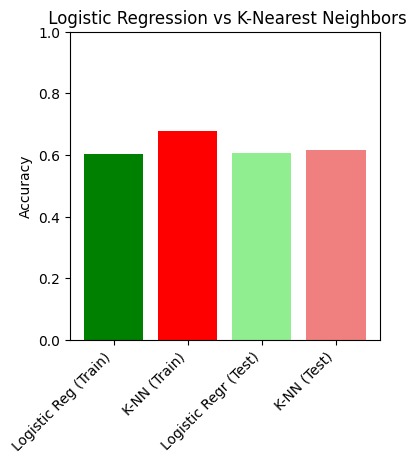

In [12]:
# Accuracy values
accuracy_values = [log_rg_train_accuracy, knn_train_accuracy, log_rg_test_accuracy, knn_test_accuracy]
labels = ['Logistic Reg (Train)', 'K-NN (Train)', 'Logistic Regr (Test)', 'K-NN (Test)']
plt.figure(figsize=(4, 4))
plt.bar(labels, accuracy_values, color=['green', 'red', 'lightgreen', 'lightcoral'])
plt.ylim(0, 1)
plt.title(' Logistic Regression vs K-Nearest Neighbors')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()
